In [2]:
import seaborn as sns
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# Load the Drive and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KR_ML 2022/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


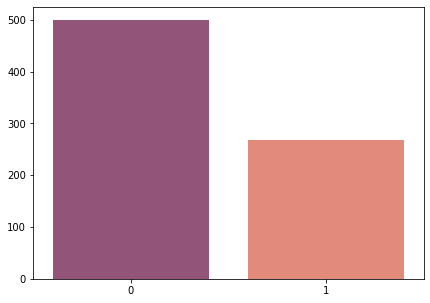

In [7]:
patient_count = df['Outcome'].value_counts()
plt.figure(figsize=(7,5))
sns.barplot(patient_count.index, patient_count.values, alpha=0.8 , palette = 'rocket')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


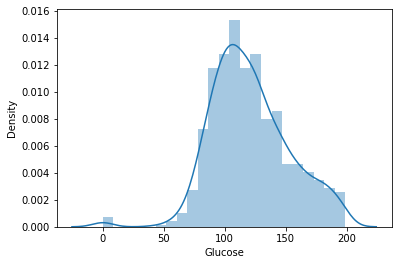

In [8]:
sns.distplot(df['Glucose'])


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


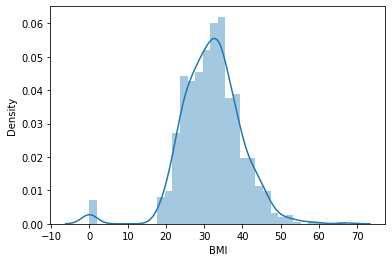

In [9]:
sns.distplot(df['BMI'])


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


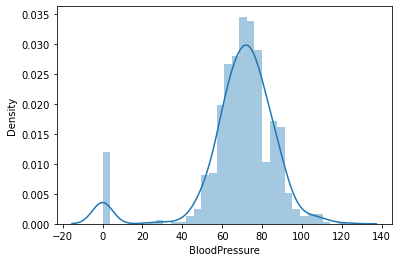

In [10]:
sns.distplot(df['BloodPressure'])


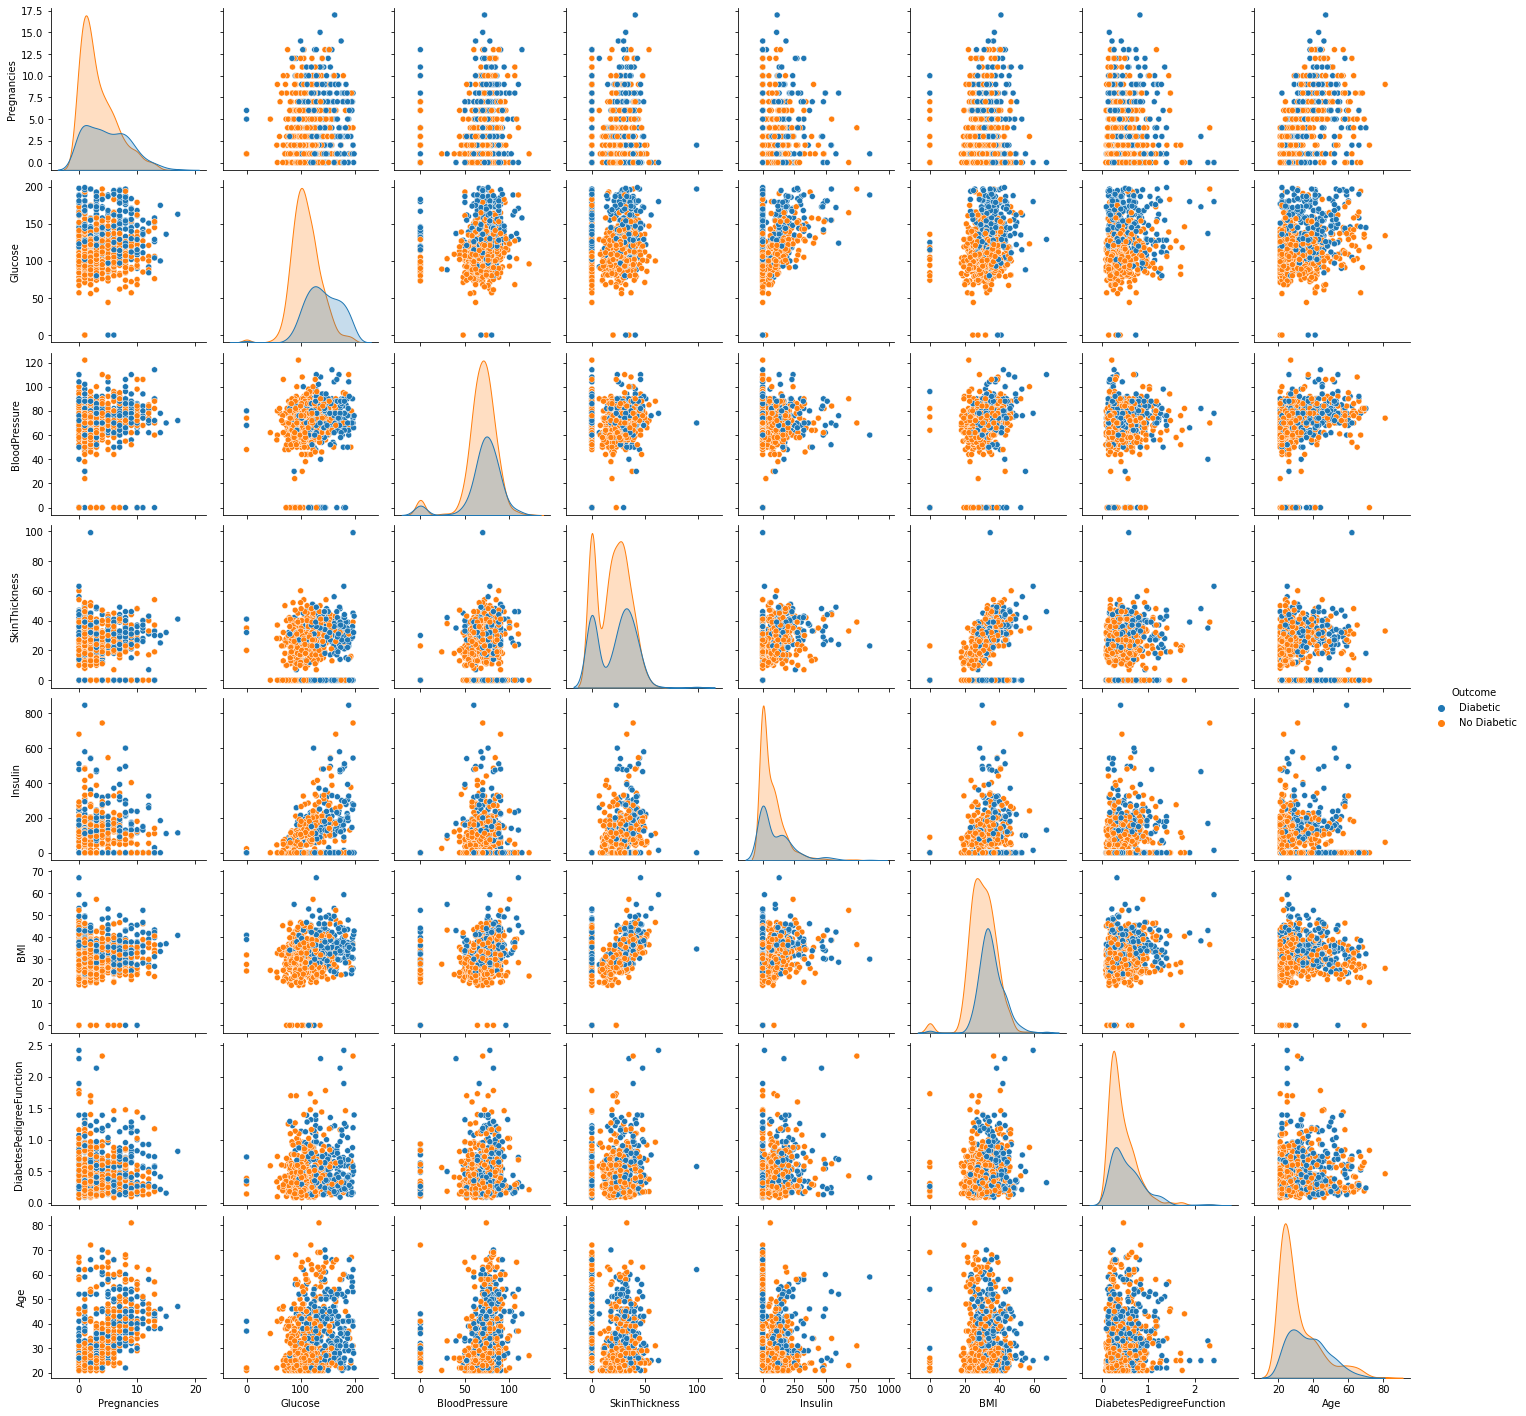

In [11]:
df["Outcome"] = np.where(df["Outcome"] == 1 ,"Diabetic","No Diabetic")
sns.pairplot(df , hue ="Outcome")

Предсказание

In [26]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KR_ML 2022/diabetes.csv')


In [27]:
X = df2.drop('Outcome' , axis = 1) #независимая функция
y = df2['Outcome'] #зависимая функция

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size =0.2,random_state=0)

In [29]:
# Creating Tensors
X_train=torch.FloatTensor(X_train.values)
X_test=torch.FloatTensor(X_test.values)
y_train=torch.LongTensor(y_train.values)
y_test=torch.LongTensor(y_test.values)

In [70]:
#Creating the Model
class ANN_model(nn.Module):
    def __init__(self,input_features=8,hidden1=20, hidden2=10,out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,out_features)
        
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [71]:
torch.manual_seed(20)
model = ANN_model()

In [72]:
# Backward Propergation - loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [73]:
epochs=1000
final_losses=[]
for i in range(epochs):
    i= i+1
    y_pred = model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i % 10 == 1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 7.187566757202148
Epoch number: 11 and the loss : 0.8532984256744385
Epoch number: 21 and the loss : 0.716244637966156
Epoch number: 31 and the loss : 0.6571372747421265
Epoch number: 41 and the loss : 0.6171260476112366
Epoch number: 51 and the loss : 0.6081922054290771
Epoch number: 61 and the loss : 0.6015171408653259
Epoch number: 71 and the loss : 0.5953478813171387
Epoch number: 81 and the loss : 0.5914437770843506
Epoch number: 91 and the loss : 0.5878034830093384
Epoch number: 101 and the loss : 0.5838866829872131
Epoch number: 111 and the loss : 0.5791389346122742
Epoch number: 121 and the loss : 0.5727564692497253
Epoch number: 131 and the loss : 0.5666334629058838
Epoch number: 141 and the loss : 0.5580757260322571
Epoch number: 151 and the loss : 0.5513749122619629
Epoch number: 161 and the loss : 0.5447184443473816
Epoch number: 171 and the loss : 0.5398930311203003
Epoch number: 181 and the loss : 0.5355622172355652
Epoch number: 191 and the

In [74]:
predictions = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        

Text(33.0, 0.5, 'Predicted')

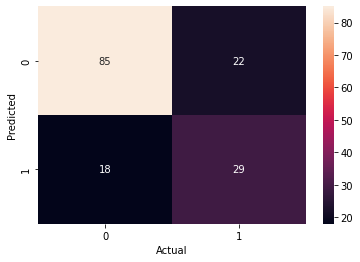

In [75]:
cm = confusion_matrix(y_test,predictions)
cm
sns.heatmap(cm,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [76]:
#Accuracy
score = accuracy_score(y_test , predictions)
print(score)

0.7402597402597403
